In [1]:
using Revise
using PauliPropagation
using Plots

In [15]:
nq = 25
pstr = PauliString(nq, :Z, 13)

PauliString(nqubits: 25, 1.0 * IIIIIIIIIIIIZIIIIIII...)

In [16]:
nl = 12
topo = bricklayertopology(nq; periodic=true)

circuit = hardwareefficientcircuit(nq, nl; topology=topo);

### Testing Weight Truncation

In [19]:
Ws = 0:10
@time weight_errors = [estimateaverageerror(circuit, pstr, 100000; max_weight=W) for W in Ws];
# where errors are zero, replace with small number to avoid log(0) error
weight_errors[weight_errors .<= 1e-10] .= 1e-10;

  1.276595 seconds (13.24 M allocations: 296.105 MiB, 1.90% gc time, 2.31% compilation time)


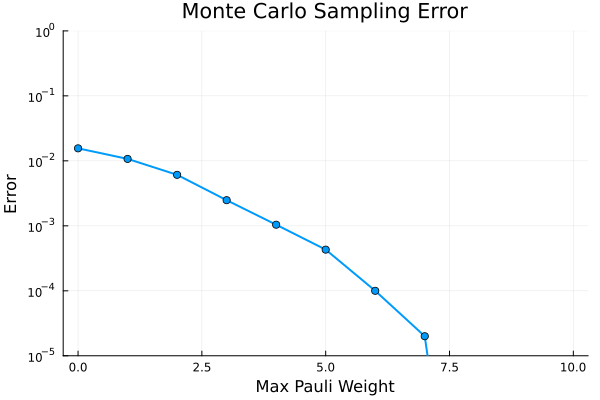

In [20]:
plot(Ws, weight_errors, yscale=:log10, xlabel="Max Pauli Weight", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)

### Testing Frequency Truncation

In [21]:
wrapped_pstr = wrapcoefficients(pstr, PauliFreqTracker)

PauliString(nqubits: 25, PathProperty(PauliFreqTracker{Float64}) * IIIIIIIIIIIIZIIIIIII...)

In [36]:
freqs = 20:20:200
@time freq_errors = [estimateaverageerror(circuit, wrapped_pstr, 100000; max_freq=freq) for freq in freqs]
# where errors are zero, replace with small number to avoid log(0) error
freq_errors[freq_errors .<= 1e-10] .= 1e-10;

  1.747788 seconds (7.04 M allocations: 284.663 MiB, 1.49% gc time, 1.46% compilation time)


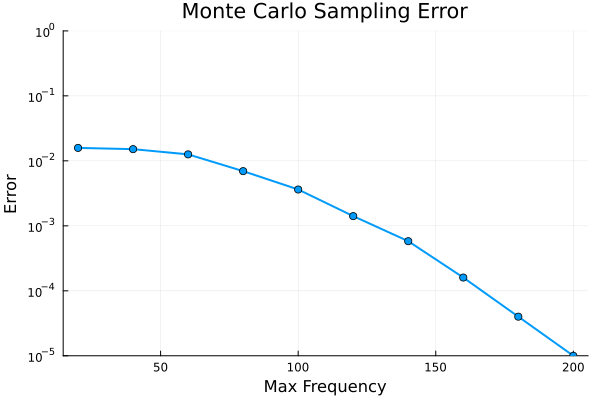

In [37]:
plot(freqs, freq_errors, yscale=:log10, xlabel="Max Frequency", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)

### Test Small-Angle Truncation

  1.752355 seconds (8.84 M allocations: 329.797 MiB, 2.18% gc time, 1.18% compilation time)
  1.743070 seconds (8.82 M allocations: 328.423 MiB, 2.31% gc time)
  1.790761 seconds (8.82 M allocations: 328.423 MiB, 2.71% gc time)
  1.785778 seconds (8.82 M allocations: 328.423 MiB, 2.08% gc time)
  1.762113 seconds (8.82 M allocations: 328.423 MiB)
  1.800095 seconds (8.82 M allocations: 328.423 MiB, 2.07% gc time)
  1.885442 seconds (8.82 M allocations: 328.423 MiB, 2.52% gc time)
  1.926745 seconds (8.82 M allocations: 328.423 MiB, 1.89% gc time)
  1.975238 seconds (8.82 M allocations: 328.423 MiB, 1.90% gc time)
  1.893126 seconds (8.82 M allocations: 328.423 MiB)


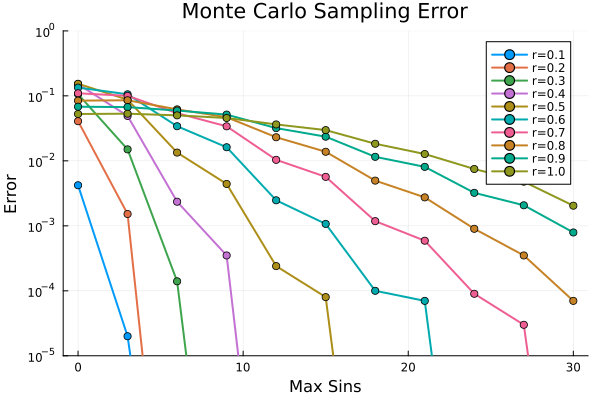

In [39]:
nsins = 0:3:30
rs = 0.1:0.1:1.0

pl = plot(yscale=:log10, xlabel="Max Sins", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0))

for r in rs
    @time sins_errors = [estimateaverageerror(circuit, wrapped_pstr, 100000, r; max_sins=ns) for ns in nsins]
    # where errors are zero, replace with small number to avoid log(0) error
    sins_errors[sins_errors .<= 1e-10] .= 1e-10;

    plot!(nsins, sins_errors, label="r=$(round(r, sigdigits=2))", linewidth=2, marker=:circle)
end
pl

### All together

  2.005349 seconds (8.95 M allocations: 354.025 MiB, 2.68% gc time, 28.78% compilation time)
  1.922178 seconds (8.82 M allocations: 345.210 MiB)
  1.931747 seconds (8.82 M allocations: 345.210 MiB, 1.38% gc time)
  1.944262 seconds (8.82 M allocations: 345.210 MiB, 1.39% gc time)
  1.910967 seconds (8.82 M allocations: 345.210 MiB, 1.35% gc time)
  1.925215 seconds (8.82 M allocations: 345.210 MiB, 1.36% gc time)
  1.928123 seconds (8.82 M allocations: 345.210 MiB, 1.34% gc time)
  1.925659 seconds (8.82 M allocations: 345.210 MiB)
  2.020685 seconds (8.82 M allocations: 345.210 MiB, 1.33% gc time)
  1.961341 seconds (8.82 M allocations: 345.210 MiB, 1.30% gc time)


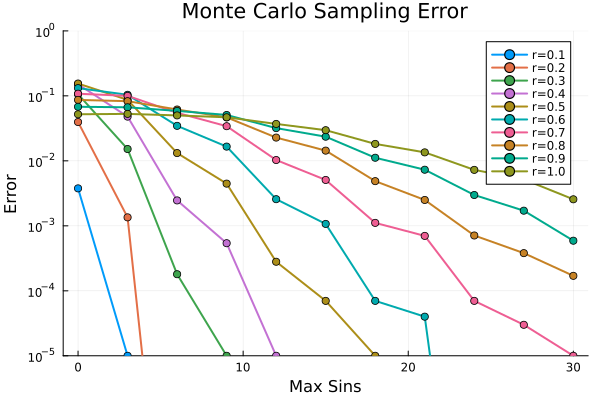

In [42]:
nsins = 0:3:30
rs = 0.1:0.1:1.0

pl = plot(yscale=:log10, xlabel="Max Sins", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0))

for r in rs
    @time sins_errors = [estimateaverageerror(circuit, wrapped_pstr, 100000, r; max_sins=ns, max_weight=6) for ns in nsins]
    # where errors are zero, replace with small number to avoid log(0) error
    sins_errors[sins_errors .<= 1e-10] .= 1e-10;

    plot!(nsins, sins_errors, label="r=$(round(r, sigdigits=2))", linewidth=2, marker=:circle)
end
pl

In [56]:
thetas = randn(countparameters(circuit))*0.6;

In [57]:
@time psum_both = propagate(circuit, wrapped_pstr, thetas; max_sins=20, max_weight=6)

  3.650925 seconds (5.92 k allocations: 668.563 MiB, 1.43% gc time)


PauliSum(nqubits: 25, 170590 Pauli terms:
 PathProperty(-0.00024483) * IIIIIIIIIZZZIIZXIIII...
 PathProperty(-4.9838e-5) * IIIIIIIIYXZZIIYXIIII...
 PathProperty(-1.995e-6) * IIIIIIIIIIYXYIXIIYII...
 PathProperty(-5.0159e-8) * IIIIIIIIIIZYZYZIIZII...
 PathProperty(0.00033909) * IIIIIIIIIYXZIYXIIIII...
 PathProperty(-4.1106e-5) * IIIIIIIYZZYIZYIIIIII...
 PathProperty(-2.0835e-8) * IIIIIIIIIIIIXYIIXIXY...
 PathProperty(-1.2389e-6) * IIIIIIIIIIIYYXIXIIYI...
 PathProperty(6.5119e-5) * IIIIIIIIZZZIIZXIIIII...
 PathProperty(8.338e-5) * IIIIIIIIYIYIYXXYIIII...
 PathProperty(-1.5895e-9) * IIIIIIIIIIIZIXIZZIYI...
 PathProperty(0.00028846) * IIIIIIIIYZZXIYZIIIII...
 PathProperty(0.00012642) * IIIIIIIIIIIXZYZIZYII...
 PathProperty(9.1681e-6) * IIIIIIIIIIIYIZIYZXZI...
 PathProperty(-2.2577e-6) * IIIIIIIIIXXXZYIIZIII...
 PathProperty(-1.7204e-6) * IIIIIIZXIXXXXIIIIIII...
 PathProperty(-3.258e-8) * IIIIIIIIIIIZXIYXYIXI...
 PathProperty(9.1632e-5) * IIIIIIIXYIZZIIYIIIII...
 PathProperty(3.4543e-6) * I

In [58]:
@time psum_sins = propagate(circuit, wrapped_pstr, thetas; max_sins=20)

 36.252812 seconds (5.85 k allocations: 2.973 GiB, 0.36% gc time)


PauliSum(nqubits: 25, 1478237 Pauli terms:
 PathProperty(-5.0596e-7) * IIIIIIIIIIIIYZZYZYYY...
 PathProperty(-1.8543e-8) * IIIIYZIXZXZXIIIIIIII...
 PathProperty(-1.6861e-7) * IIIIIIIIIIIIIZZXZXXX...
 PathProperty(-1.9233e-9) * IIIIIIIIIIIZZXZXXXXY...
 PathProperty(4.6757e-7) * IIIIIZXYYZYZIIIIIIII...
 PathProperty(4.5381e-7) * IIIIYXZZYYYXYIIIIIII...
 PathProperty(-3.3941e-8) * IIIIZYZXXXZIXIIIIIII...
 PathProperty(3.0148e-6) * IIIIIZYZXXXZIXIIIIII...
 PathProperty(1.7544e-6) * IIIIIIIYZXXZYXZZZIII...
 PathProperty(-5.5084e-5) * IIIIIIIIYIYIYXXYIIII...
 PathProperty(-2.7312e-6) * IIIIIIIIIIXXZZYYZYXI...
 PathProperty(4.8983e-7) * IIIIIIIIIIIXZXYYXXZZ...
 PathProperty(-3.4028e-8) * IIIIYZZYZZZZZZXIIIII...
 PathProperty(-3.5655e-7) * IIIIIIIIIIYYYZXXZXZI...
 PathProperty(3.0931e-6) * IIIIIIIZXXZZIXXZXIII...
 PathProperty(-1.998e-9) * IIIIIIIIIIIIYXZXXZXX...
 PathProperty(-2.1262e-7) * IIIIIIIIIIIIXYYZIIZX...
 PathProperty(5.7982e-9) * IIIIIIIIIIYZZZXZZXZY...
 PathProperty(-1.2467e-5) * I

In [63]:
overlapwithzero(psum_both), overlapwithzero(psum_sins)

(0.5106299697422105, 0.5064308039626876)

In [64]:
overlapwithzero(psum_both) - overlapwithzero(psum_sins)

0.004199165779522951